# Text Classification TF Training Testing

# Import Dataset

In [1]:
import numpy as np
import pandas as pd
data_df = pd.read_csv('../Output/Top10_Cancer_1.csv', encoding='utf-8')
data_df = data_df[['Article', 'Clean Article', 'ClassID', 'Class']]
data_df.head(10)

,Article,Clean Article,ClassID,Class
0,Optimal adjuvant therapy in clinically N2 non-...,optimal adjuvant therapy clinically n non smal...,1,lung
1,Assessment of interpatient heterogeneity in tu...,assessment interpatient heterogeneity tumor ra...,1,lung
2,[Current problems in the combined therapy of l...,current problem combine therapy lung cancer pa...,1,lung
3,Effect of therapeutic irradiation on lymphocyt...,effect therapeutic irradiation lymphocyte tran...,1,lung
4,Use of intensive care in patients with nonrese...,use intensive care patient nonresectable lung ...,1,lung
5,Establishment of a drug sensitivity panel usin...,establishment drug sensitivity panel use human...,1,lung
6,Effect of gefitinib re-challenge to initial ge...,effect gefitinib challenge initial gefitinib r...,1,lung
7,[Exposed workers to lung cancer risk. An estim...,expose worker lung cancer risk estimation use ...,1,lung
8,Cytology nomenclature and 2015 World Health Or...,cytology nomenclature world health organizatio...,1,lung
9,[Repeated surgery for lung cancer] -,repeat surgery lung cancer,1,lung


In [2]:
from sklearn.model_selection import train_test_split

train_corpus, test_corpus, train_label_nums, test_label_nums, train_label_names, test_label_names =\
                                 train_test_split(np.array(data_df['Clean Article']), np.array(data_df['ClassID']),
                                                       np.array(data_df['Class']), test_size=0.33, random_state=42)

train_corpus.shape, test_corpus.shape

((6700,), (3300,))

In [3]:
from collections import Counter

trd = dict(Counter(train_label_names))
tsd = dict(Counter(test_label_names))

(pd.DataFrame([[key, trd[key], tsd[key]] for key in trd], 
             columns=['Target Label', 'Train Count', 'Test Count'])
.sort_values(by=['Train Count', 'Test Count'],
             ascending=False))

,Target Label,Train Count,Test Count
2,bladder,693,307
5,colorectal,685,315
4,oesophagus,681,319
8,cervix_uteri,680,320
1,liver,677,323
3,prostate,668,332
9,breast,665,335
7,lung,655,345
6,stomach,649,351
0,thyroid,647,353


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

# build BOW features on train articles
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0)
cv_train_features = cv.fit_transform(train_corpus)

In [5]:
print(cv_train_features.shape)

(6700, 49221)


In [6]:
print(cv_train_features)

  (0, 35477)	2
  (0, 12096)	3
  (0, 28500)	1
  (0, 26425)	3
  (0, 20014)	2
  (0, 43680)	5
  (0, 7412)	5
  (0, 42722)	1
  (0, 40777)	1
  (0, 38943)	1
  (0, 45155)	2
  (0, 31641)	1
  (0, 13456)	1
  (0, 14153)	1
  (0, 9074)	1
  (0, 26485)	1
  (0, 8518)	1
  (0, 8334)	1
  (0, 33896)	1
  (0, 25934)	1
  (0, 20019)	1
  (0, 5623)	1
  (0, 23154)	1
  (0, 40945)	1
  (0, 32253)	1
  :	:
  (6697, 32555)	1
  (6697, 34119)	1
  (6697, 26542)	1
  (6697, 4364)	1
  (6697, 29763)	1
  (6697, 19295)	1
  (6697, 21421)	1
  (6697, 13945)	1
  (6697, 13438)	1
  (6697, 11262)	1
  (6697, 42391)	1
  (6697, 5787)	1
  (6697, 43327)	1
  (6698, 7412)	1
  (6698, 24882)	1
  (6698, 24489)	1
  (6698, 39299)	1
  (6698, 22197)	1
  (6699, 33738)	1
  (6699, 24813)	1
  (6699, 8462)	1
  (6699, 46465)	1
  (6699, 5130)	1
  (6699, 25503)	1
  (6699, 44759)	1


In [7]:
# transform test articles into features
cv_test_features = cv.transform(test_corpus)
print(cv_test_features.shape)
print(cv_train_features)

(3300, 49221)
  (0, 35477)	2
  (0, 12096)	3
  (0, 28500)	1
  (0, 26425)	3
  (0, 20014)	2
  (0, 43680)	5
  (0, 7412)	5
  (0, 42722)	1
  (0, 40777)	1
  (0, 38943)	1
  (0, 45155)	2
  (0, 31641)	1
  (0, 13456)	1
  (0, 14153)	1
  (0, 9074)	1
  (0, 26485)	1
  (0, 8518)	1
  (0, 8334)	1
  (0, 33896)	1
  (0, 25934)	1
  (0, 20019)	1
  (0, 5623)	1
  (0, 23154)	1
  (0, 40945)	1
  (0, 32253)	1
  :	:
  (6697, 32555)	1
  (6697, 34119)	1
  (6697, 26542)	1
  (6697, 4364)	1
  (6697, 29763)	1
  (6697, 19295)	1
  (6697, 21421)	1
  (6697, 13945)	1
  (6697, 13438)	1
  (6697, 11262)	1
  (6697, 42391)	1
  (6697, 5787)	1
  (6697, 43327)	1
  (6698, 7412)	1
  (6698, 24882)	1
  (6698, 24489)	1
  (6698, 39299)	1
  (6698, 22197)	1
  (6699, 33738)	1
  (6699, 24813)	1
  (6699, 8462)	1
  (6699, 46465)	1
  (6699, 5130)	1
  (6699, 25503)	1
  (6699, 44759)	1


In [8]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)

BOW model:> Train features shape: (6700, 49221)  Test features shape: (3300, 49221)


In [19]:
data_labels_map = dict(enumerate(pd.unique(data_df['Class'])))
data_labels_map

{0: 'lung',
 1: 'breast',
 2: 'colorectal',
 3: 'prostate',
 4: 'stomach',
 5: 'liver',
 6: 'oesophagus',
 7: 'cervix_uteri',
 8: 'thyroid',
 9: 'bladder'}

In [20]:
label_data_map = {v:k for k, v in data_labels_map.items()}
label_map_df = pd.DataFrame(list(label_data_map.items()), columns=['Label Name', 'Label Number'])
label_map_df

,Label Name,Label Number
0,lung,0
1,breast,1
2,colorectal,2
3,prostate,3
4,stomach,4
5,liver,5
6,oesophagus,6
7,cervix_uteri,7
8,thyroid,8
9,bladder,9


# Naive Bayes

In [9]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=1)
mnb.fit(cv_train_features, train_label_names)

mnb_bow_cv_scores = cross_val_score(mnb, cv_train_features, train_label_names, cv=5)

mnb_bow_cv_mean_score = np.mean(mnb_bow_cv_scores)
print('Train Score (5-fold):', mnb_bow_cv_scores)
print('Average Train Score :', mnb_bow_cv_mean_score)
mnb_bow_test_score = mnb.score(cv_test_features, test_label_names)
print('Test Accuracy:', mnb_bow_test_score)

Train Score (5-fold): [0.91044776 0.91268657 0.90746269 0.9119403  0.91716418]
Average Train Score : 0.9119402985074627
Test Accuracy: 0.9072727272727272


In [40]:
mnb = MultinomialNB(alpha=1)
start = time.time()
mnb.fit(cv_train_features, train_label_names)
stop = time.time()
timemnb = str(round(stop-start,3)) + 's'
print('Training time: ', timemnb)

Training time:  0.04s


In [23]:
import model_evaluation_utils as meu

mnb_predictions = mnb.predict(cv_test_features)
unique_classes = list(set(test_label_names))
meu.get_metrics(true_labels=test_label_names, predicted_labels=mnb_predictions)
meu.display_classification_report(true_labels=test_label_names, predicted_labels=mnb_predictions, classes=unique_classes)

Accuracy: 0.9073
Precision: 0.9142
Recall: 0.9073
F1 Score: 0.9072
              precision    recall  f1-score   support

     stomach       0.97      0.73      0.84       351
     thyroid       0.96      0.98      0.97       353
    prostate       0.92      0.96      0.94       332
     bladder       0.87      0.96      0.91       307
  oesophagus       0.84      0.91      0.87       319
cervix_uteri       0.99      0.87      0.92       320
  colorectal       0.80      0.92      0.86       315
      breast       0.96      0.91      0.94       335
       liver       0.82      0.93      0.87       323
        lung       0.98      0.91      0.94       345

    accuracy                           0.91      3300
   macro avg       0.91      0.91      0.91      3300
weighted avg       0.91      0.91      0.91      3300



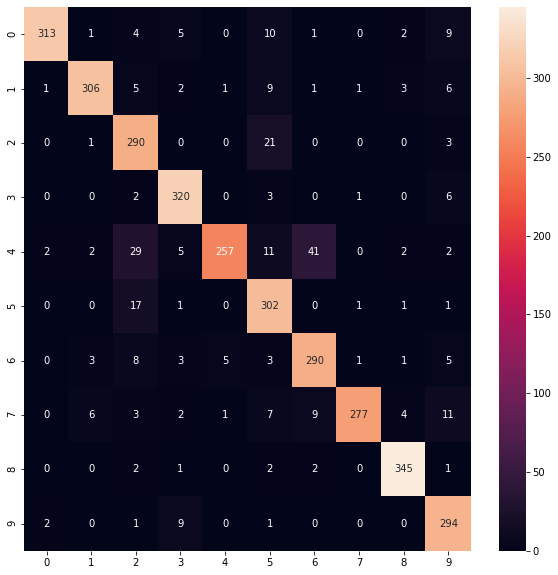

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm1 = confusion_matrix(test_label_names, mnb_predictions, labels=label_map_df['Label Name'].values)
plt.figure(figsize=(10,10))
sns.heatmap(cm1, annot=True, fmt='d')

# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1, random_state=42)
lr.fit(cv_train_features, train_label_names)
lr_bow_cv_scores = cross_val_score(lr, cv_train_features, train_label_names, cv=5)
lr_bow_cv_mean_score = np.mean(lr_bow_cv_scores)
print('Train Score (5-fold):', lr_bow_cv_scores)
print('Average Train Score :', lr_bow_cv_mean_score)
lr_bow_test_score = lr.score(cv_test_features, test_label_names)
print('Test Accuracy:', lr_bow_test_score)

Train Score (5-fold): [0.97761194 0.97238806 0.96268657 0.97835821 0.97313433]
Average Train Score : 0.9728358208955225
Test Accuracy: 0.9748484848484849


In [42]:
import time

lr = LogisticRegression(penalty='l2', max_iter=100, C=1, random_state=42)
start = time.time()
lr.fit(cv_train_features, train_label_names)
stop = time.time()
timelr = str(round(stop-start,3)) + 's'
print('Training time: ', timelr)

Training time:  6.104s


In [24]:
lr_predictions = lr.predict(cv_test_features)
unique_classes = list(set(test_label_names))
meu.get_metrics(true_labels=test_label_names, predicted_labels=lr_predictions)
meu.display_classification_report(true_labels=test_label_names, predicted_labels=lr_predictions, classes=unique_classes)

Accuracy: 0.9748
Precision: 0.9751
Recall: 0.9748
F1 Score: 0.9749
              precision    recall  f1-score   support

     stomach       0.98      0.95      0.96       351
     thyroid       1.00      0.99      1.00       353
    prostate       0.98      0.99      0.99       332
     bladder       0.99      0.97      0.98       307
  oesophagus       0.96      0.95      0.96       319
cervix_uteri       0.93      0.98      0.95       320
  colorectal       0.98      0.96      0.97       315
      breast       0.98      1.00      0.99       335
       liver       0.96      0.96      0.96       323
        lung       0.99      0.99      0.99       345

    accuracy                           0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.98      0.97      0.97      3300



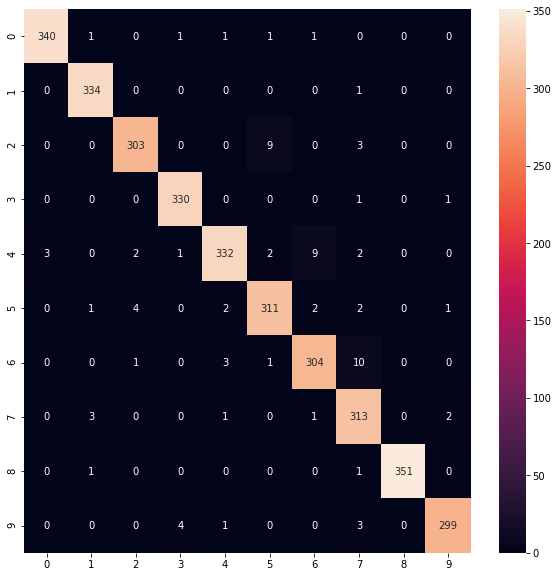

In [30]:
cm2 = confusion_matrix(test_label_names, lr_predictions, labels=label_map_df['Label Name'].values)
plt.figure(figsize=(10,10))
sns.heatmap(cm2, annot=True, fmt='d')

# Linier SVM

In [11]:
from sklearn.svm import LinearSVC

svm = LinearSVC(penalty='l2', C=1, random_state=42)
svm.fit(cv_train_features, train_label_names)
svm_bow_cv_scores = cross_val_score(svm, cv_train_features, train_label_names, cv=5)
svm_bow_cv_mean_score = np.mean(svm_bow_cv_scores)
print('Train Score (5-fold):', svm_bow_cv_scores)
print('Average Train Score :', svm_bow_cv_mean_score)
svm_bow_test_score = svm.score(cv_test_features, test_label_names)
print('Test Accuracy:', svm_bow_test_score)

C:\Users\Thalut\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Thalut\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train Score (5-fold): [0.96641791 0.96716418 0.95970149 0.97835821 0.97238806]
Average Train Score : 0.9688059701492537
Test Accuracy: 0.9724242424242424


In [43]:
svm = LinearSVC(penalty='l2', C=1, random_state=42)
start = time.time()
svm.fit(cv_train_features, train_label_names)
stop = time.time()
timesvm = str(round(stop-start,3)) + 's'
print('Training time: ', timesvm)

Training time:  0.258s


C:\Users\Thalut\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [25]:
svm_predictions = svm.predict(cv_test_features)
unique_classes = list(set(test_label_names))
meu.get_metrics(true_labels=test_label_names, predicted_labels=svm_predictions)
meu.display_classification_report(true_labels=test_label_names, predicted_labels=svm_predictions, classes=unique_classes)

Accuracy: 0.9724
Precision: 0.9725
Recall: 0.9724
F1 Score: 0.9724
              precision    recall  f1-score   support

     stomach       0.98      0.93      0.95       351
     thyroid       0.99      1.00      0.99       353
    prostate       0.98      0.99      0.99       332
     bladder       0.99      0.98      0.98       307
  oesophagus       0.96      0.96      0.96       319
cervix_uteri       0.95      0.96      0.96       320
  colorectal       0.97      0.95      0.96       315
      breast       0.98      0.99      0.99       335
       liver       0.94      0.97      0.95       323
        lung       0.99      0.99      0.99       345

    accuracy                           0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300



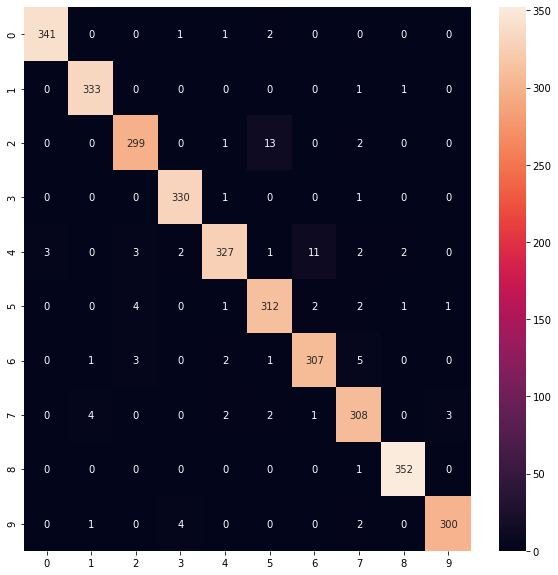

In [31]:
cm3 = confusion_matrix(test_label_names, svm_predictions, labels=label_map_df['Label Name'].values)
plt.figure(figsize=(10,10))
sns.heatmap(cm3, annot=True, fmt='d')

# Linier SVM(SGD)

In [12]:
from sklearn.linear_model import SGDClassifier

svm_sgd = SGDClassifier(loss='hinge', penalty='l2', max_iter=5, random_state=42)
svm_sgd.fit(cv_train_features, train_label_names)
svmsgd_bow_cv_scores = cross_val_score(svm_sgd, cv_train_features, train_label_names, cv=5)
svmsgd_bow_cv_mean_score = np.mean(svmsgd_bow_cv_scores)
print('Train Score (5-fold):', svmsgd_bow_cv_scores)
print('Average Train Score :', svmsgd_bow_cv_mean_score)
svmsgd_bow_test_score = svm_sgd.score(cv_test_features, test_label_names)
print('Test Accuracy:', svmsgd_bow_test_score)

C:\Users\Thalut\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Thalut\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Train Score (5-fold): [0.96940299 0.96567164 0.96567164 0.97313433 0.97089552]
Average Train Score : 0.968955223880597
Test Accuracy: 0.9696969696969697


In [44]:
svm_sgd = SGDClassifier(loss='hinge', penalty='l2', max_iter=5, random_state=42)
start = time.time()
svm_sgd.fit(cv_train_features, train_label_names)
stop = time.time()
timesvm_sgd = str(round(stop-start,3)) + 's'
print('Training time: ', timesvm_sgd)

Training time:  0.11s


C:\Users\Thalut\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [26]:
svm_sgd_predictions = svm_sgd.predict(cv_test_features)
unique_classes = list(set(test_label_names))
meu.get_metrics(true_labels=test_label_names, predicted_labels=svm_sgd_predictions)
meu.display_classification_report(true_labels=test_label_names, predicted_labels=svm_sgd_predictions, classes=unique_classes)

Accuracy: 0.9697
Precision: 0.9698
Recall: 0.9697
F1 Score: 0.9696
              precision    recall  f1-score   support

     stomach       0.98      0.91      0.94       351
     thyroid       0.99      1.00      0.99       353
    prostate       0.98      0.99      0.99       332
     bladder       0.96      0.98      0.97       307
  oesophagus       0.94      0.95      0.95       319
cervix_uteri       0.97      0.97      0.97       320
  colorectal       0.94      0.97      0.95       315
      breast       0.99      0.99      0.99       335
       liver       0.96      0.95      0.95       323
        lung       0.99      0.99      0.99       345

    accuracy                           0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300



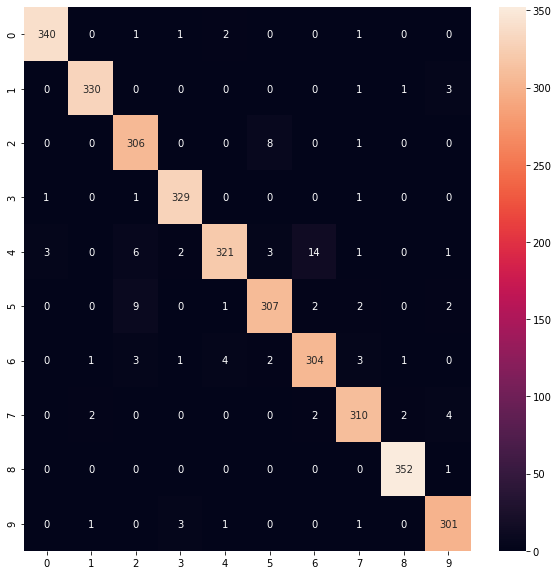

In [32]:
cm4 = confusion_matrix(test_label_names, svm_sgd_predictions, labels=label_map_df['Label Name'].values)
plt.figure(figsize=(10,10))
sns.heatmap(cm4, annot=True, fmt='d')

# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(cv_train_features, train_label_names)
rfc_bow_cv_scores = cross_val_score(rfc, cv_train_features, train_label_names, cv=5)
rfc_bow_cv_mean_score = np.mean(rfc_bow_cv_scores)
print('Train Score (5-fold):', rfc_bow_cv_scores)
print('Average Train Score :', rfc_bow_cv_mean_score)
rfc_bow_test_score = rfc.score(cv_test_features, test_label_names)
print('Test Accuracy:', rfc_bow_test_score)

Train Score (5-fold): [0.85447761 0.89029851 0.89850746 0.89552239 0.9119403 ]
Average Train Score : 0.8901492537313433
Test Accuracy: 0.8915151515151515


In [46]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
start = time.time()
rfc.fit(cv_train_features, train_label_names)
stop = time.time()
timerfc = str(round(stop-start,3)) + 's'
print('Training time: ', timerfc)

Training time:  1.327s


In [27]:
rfc_predictions = rfc.predict(cv_test_features)
unique_classes = list(set(test_label_names))
meu.get_metrics(true_labels=test_label_names, predicted_labels=rfc_predictions)
meu.display_classification_report(true_labels=test_label_names, predicted_labels=rfc_predictions, classes=unique_classes)

Accuracy: 0.8915
Precision: 0.8958
Recall: 0.8915
F1 Score: 0.892
              precision    recall  f1-score   support

     stomach       0.94      0.84      0.89       351
     thyroid       0.97      0.86      0.91       353
    prostate       0.95      0.94      0.95       332
     bladder       0.80      0.92      0.86       307
  oesophagus       0.92      0.87      0.90       319
cervix_uteri       0.89      0.92      0.90       320
  colorectal       0.83      0.93      0.88       315
      breast       0.85      0.93      0.89       335
       liver       0.84      0.85      0.85       323
        lung       0.93      0.86      0.89       345

    accuracy                           0.89      3300
   macro avg       0.89      0.89      0.89      3300
weighted avg       0.90      0.89      0.89      3300



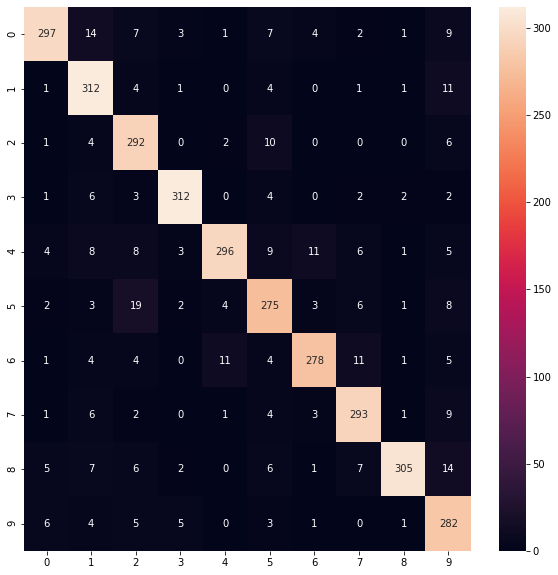

In [33]:
cm5 = confusion_matrix(test_label_names, rfc_predictions, labels=label_map_df['Label Name'].values)
plt.figure(figsize=(10,10))
sns.heatmap(cm5, annot=True, fmt='d')

# Gradient Boosting Machine

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=10, random_state=42)
gbc.fit(cv_train_features, train_label_names)
gbc_bow_cv_scores = cross_val_score(gbc, cv_train_features, train_label_names, cv=5)
gbc_bow_cv_mean_score = np.mean(gbc_bow_cv_scores)
print('Train Score (5-fold):', gbc_bow_cv_scores)
print('Average Train Score :', gbc_bow_cv_mean_score)
gbc_bow_test_score = gbc.score(cv_test_features, test_label_names)
print('Test Accuracy:', gbc_bow_test_score)

Train Score (5-fold): [0.97164179 0.96044776 0.96567164 0.97686567 0.96567164]
Average Train Score : 0.9680597014925374
Test Accuracy: 0.9636363636363636


In [47]:
gbc = GradientBoostingClassifier(n_estimators=10, random_state=42)
start = time.time()
gbc.fit(cv_train_features, train_label_names)
stop = time.time()
timegbc= str(round(stop-start,3)) + 's'
print('Training time: ', timegbc)

Training time:  5.227s


In [28]:
gbc_predictions = gbc.predict(cv_test_features)
unique_classes = list(set(test_label_names))
meu.get_metrics(true_labels=test_label_names, predicted_labels=gbc_predictions)
meu.display_classification_report(true_labels=test_label_names, predicted_labels=gbc_predictions, classes=unique_classes)

Accuracy: 0.9636
Precision: 0.965
Recall: 0.9636
F1 Score: 0.9638
              precision    recall  f1-score   support

     stomach       0.97      0.93      0.95       351
     thyroid       0.99      0.99      0.99       353
    prostate       0.98      1.00      0.99       332
     bladder       1.00      0.97      0.98       307
  oesophagus       0.95      0.93      0.94       319
cervix_uteri       0.88      1.00      0.94       320
  colorectal       0.97      0.92      0.94       315
      breast       1.00      0.98      0.99       335
       liver       0.92      0.95      0.93       323
        lung       0.99      0.97      0.98       345

    accuracy                           0.96      3300
   macro avg       0.96      0.96      0.96      3300
weighted avg       0.96      0.96      0.96      3300



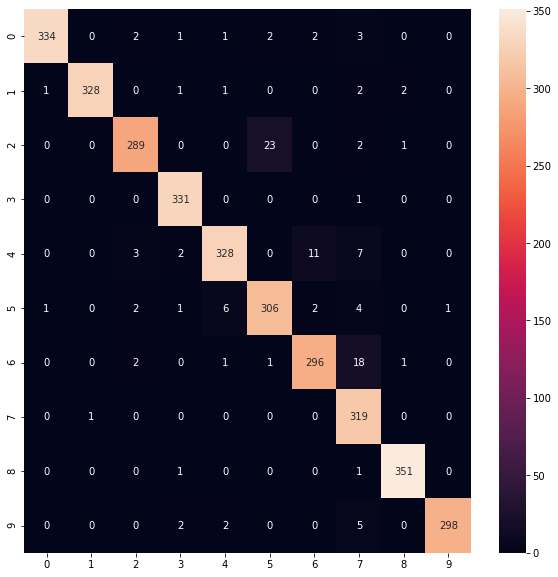

In [34]:
cm6 = confusion_matrix(test_label_names, gbc_predictions, labels=label_map_df['Label Name'].values)
plt.figure(figsize=(10,10))
sns.heatmap(cm6, annot=True, fmt='d')

In [53]:
finaldf = pd.DataFrame([['Naive Bayes', timemnb, mnb_bow_cv_mean_score, mnb_bow_test_score],
              ['Logistic Regression', timelr, lr_bow_cv_mean_score, lr_bow_test_score],
              ['Linear SVM', timesvm, svm_bow_cv_mean_score, svm_bow_test_score],
              ['Linear SVM (SGD)',  timesvm_sgd, svmsgd_bow_cv_mean_score, svmsgd_bow_test_score],
              ['Random Forest', timerfc, rfc_bow_cv_mean_score, rfc_bow_test_score],
              ['Gradient Boosted Machines', timegbc, gbc_bow_cv_mean_score, gbc_bow_test_score]],
             columns=['Model',  'Training Time(s)', 'Train Score', 'Test Score (TF)'],
             )
finaldf

,Model,Training Time(s),Train Score,Test Score (TF)
0,Naive Bayes,0.04s,0.911940,0.907273
1,Logistic Regression,6.104s,0.972836,0.974848
2,Linear SVM,0.258s,0.968806,0.972424
3,Linear SVM (SGD),0.11s,0.968955,0.969697
4,Random Forest,1.327s,0.890149,0.891515
5,Gradient Boosted Machines,5.227s,0.968060,0.963636


In [54]:
finaldf.to_csv (r'C:\Users\Thalut\Exchange\Midterm Text Mining\Output\save111.csv', index = False, header=True)

In [37]:
model_name = ['Naive Bayes', 'Linier Regression', 'SVM', 'SVM(SGD)', 'Random Forest', 'Gradient Boost Machine']
model_var = [mnb, lr, svm, svm_sgd, rfc, gbc]
for i in range(len(model_name)):
    x_predictions = model_var[i].predict(cv_test_features)
    unique_classes = list(set(test_label_names))
    print(model_name[i])
    meu.get_metrics(true_labels=test_label_names, predicted_labels=x_predictions)
    print()

Naive Bayes
Accuracy: 0.9073
Precision: 0.9142
Recall: 0.9073
F1 Score: 0.9072

Linier Regression
Accuracy: 0.9748
Precision: 0.9751
Recall: 0.9748
F1 Score: 0.9749

SVM
Accuracy: 0.9724
Precision: 0.9725
Recall: 0.9724
F1 Score: 0.9724

SVM(SGD)
Accuracy: 0.9697
Precision: 0.9698
Recall: 0.9697
F1 Score: 0.9696

Random Forest
Accuracy: 0.8915
Precision: 0.8958
Recall: 0.8915
F1 Score: 0.892

Gradient Boost Machine
Accuracy: 0.9636
Precision: 0.965
Recall: 0.9636
F1 Score: 0.9638

